# Autoencoder with Feature Agglomeration  for Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.cluster import FeatureAgglomeration

2024-02-01 16:27:09.043344: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 16:27:09.060202: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Data

In [2]:
data = pd.read_csv('../Datasets/kitsune_dataset/SSL_Renegotiation/SSL_Renegotiation_dataset.csv', index_col=0, dtype=np.float32)
labels = pd.read_csv('../Datasets/kitsune_dataset/SSL_Renegotiation/SSL_Renegotiation_labels.csv', index_col=0, dtype=np.int32)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2207570 entries, 1.9995118379592896 to 58.62225341796875
Columns: 114 entries, 1.452000000000000000e+03 to 0.000000000000000000e+00.54
dtypes: float32(114)
memory usage: 976.9 MB


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207571 entries, 1 to 2207571
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   x       int32
dtypes: int32(1)
memory usage: 25.3 MB


## Scale Data

In [5]:
scaler = pp.MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
count,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,...,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06,2.207570e+06
mean,5.230221e-01,7.310861e-01,3.786336e-01,5.231792e-01,7.304667e-01,4.491651e-01,5.232405e-01,7.361219e-01,4.818639e-01,5.226086e-01,...,5.267384e-02,3.171571e-01,5.161418e-01,5.011709e-01,5.233990e-01,1.623612e-01,5.872549e-01,5.187116e-02,3.080821e-01,5.137649e-01
std,2.157969e-01,3.460548e-01,1.833470e-01,2.154852e-01,3.449166e-01,2.129695e-01,2.150633e-01,3.464056e-01,2.316266e-01,2.138438e-01,...,4.261437e-02,4.947096e-03,1.814015e-02,1.756174e-01,4.659409e-01,1.416440e-01,4.561522e-01,4.151327e-02,5.216944e-03,2.225696e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.868801e-01,8.881618e-01,2.754798e-01,4.880169e-01,8.927369e-01,3.870998e-01,4.892890e-01,9.052647e-01,4.154522e-01,4.903207e-01,...,1.833590e-14,3.173342e-01,5.173889e-01,4.843781e-01,6.617078e-02,2.262033e-07,6.749682e-02,6.754160e-14,3.083236e-01,5.164910e-01
50%,4.924117e-01,9.036382e-01,3.523497e-01,4.921539e-01,9.034353e-01,4.353685e-01,4.918669e-01,9.104096e-01,4.772763e-01,4.917721e-01,...,7.154663e-02,3.173342e-01,5.173889e-01,5.384267e-01,2.172548e-01,2.642589e-01,9.672012e-01,7.327552e-02,3.083236e-01,5.164910e-01
75%,4.980500e-01,9.133360e-01,4.415605e-01,4.967374e-01,9.103763e-01,4.695522e-01,4.952738e-01,9.152465e-01,4.913601e-01,4.939931e-01,...,8.432073e-02,3.173342e-01,5.173889e-01,5.880302e-01,9.985632e-01,2.871549e-01,9.985632e-01,8.302195e-02,3.083236e-01,5.164910e-01
max,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00


## Train-Test Split

In [6]:
# drop the last row
labels=labels[:-1]
labels.tail(5)
# train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=False, test_size=0.3)

In [7]:
# anomaly counts
print(f'Number anomalies in train data: {y_train.sum()}')
print(f'Number anomalies in test data: {y_test.sum()}')

Number anomalies in train data: x    25928
dtype: int64
Number anomalies in test data: x    66723
dtype: int64


## Feature Agglomeration

In [92]:
n_clusters = 56
faggl = FeatureAgglomeration(n_clusters=n_clusters)
faggl.fit(X_train)

FeatureAgglomeration(n_clusters=56)

In [93]:
X_train_clust = faggl.transform(X_train)
print(X_train_clust.shape)

(1545299, 56)


In [94]:
X_test_clust = faggl.transform(X_test)
print(X_test_clust.shape)

(662271, 56)


## Define Autoencoder

In [95]:
# model parameters
n_input = X_train_clust.shape[1]
n_hidden = n_clusters/2

In [96]:
def autoencoder(n_input, n_hidden, lr=0.001):
    # define layers
    inputs = tf.keras.Input(shape=(n_input,))
    dense1 = tf.keras.layers.Dense(n_hidden, activation='relu')
    outputs = tf.keras.layers.Dense(n_input, activation='linear')
    layers = [inputs, dense1, outputs]
    # create model
    model = tf.keras.models.Sequential(layers)
    model.summary()
    # compile model
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    rmse = tf.keras.metrics.RootMeanSquaredError()
    mae = tf.keras.metrics.MeanAbsoluteError()
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=[rmse, mae])
    return model

## Train

In [97]:
model = autoencoder(n_input, n_hidden, lr=0.001)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 28)                1596      
                                                                 
 dense_13 (Dense)            (None, 56)                1624      
                                                                 
Total params: 3220 (12.58 KB)
Trainable params: 3220 (12.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0.0001,
                                                  patience=10,
                                                  verbose=0,
                                                  mode='auto',
                                                  restore_best_weights=True)
history = model.fit(X_train_clust,
                    X_train_clust,
                    epochs=100,
                    batch_size=10000,
                    validation_data=(X_test_clust, X_test_clust),
                    callbacks=[early_stopping],
                    verbose=0)

Minimal Loss: 0.0004


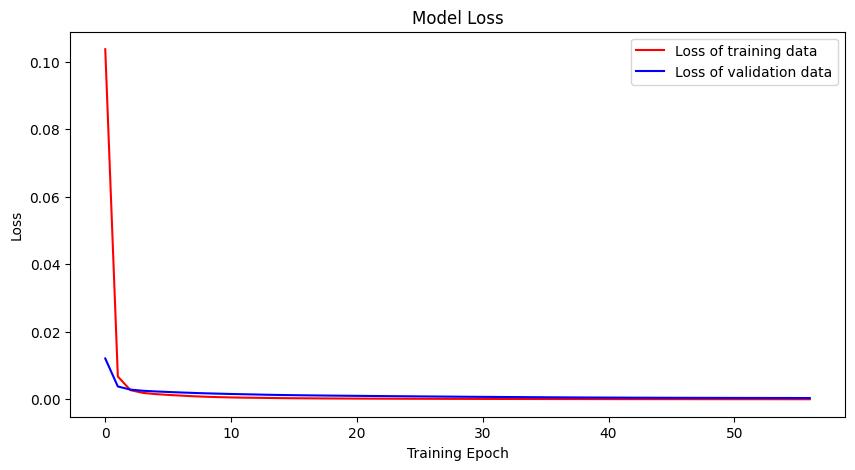

In [99]:
loss = history.history['loss']
val_loss = history.history['val_loss']
min_loss = min(val_loss)
print(f'Minimal Loss: {min_loss:.4f}')
plt.figure(figsize=(10,5))
plt.plot(loss, 'r', label='Loss of training data')
plt.plot(val_loss, 'b-', label='Loss of validation data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.legend()
plt.show()

## Evaluate

In [100]:
predictions = model.predict(X_test_clust, verbose=1)

20696/20696 [==============================] - 5s 243us/step


In [101]:
def reconstr_error(original, reconstr):
    errors = np.sqrt(np.sum((original - reconstr)**2, axis=1))
    return errors

In [102]:
errors = reconstr_error(X_test_clust, predictions)

In [103]:
# average precision score train
aps_test = average_precision_score(y_test, errors)
print(f'Average precision score for test: {aps_test:.4f}')

Average precision score for test: 0.4580


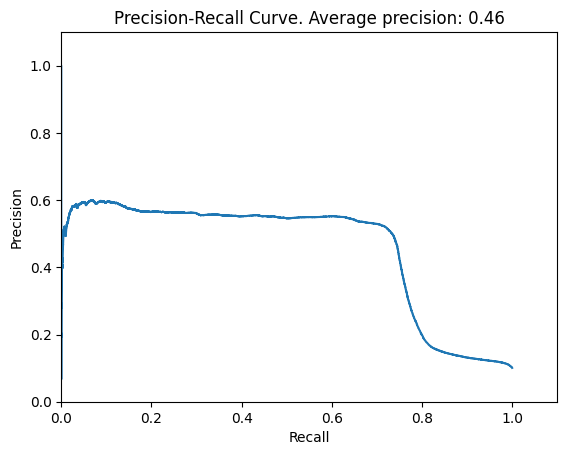

In [104]:
# precision-recall curve for test results
precision, recall, thresholds = precision_recall_curve(y_test, errors)
plt.title(f'Precision-Recall Curve. Average precision: {aps_test:.2f}')
plt.xlabel('Recall')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
#plt.ylim([0, 1.1])
#plt.xlim([0, 1.0])
plt.plot(recall, precision)
plt.show()

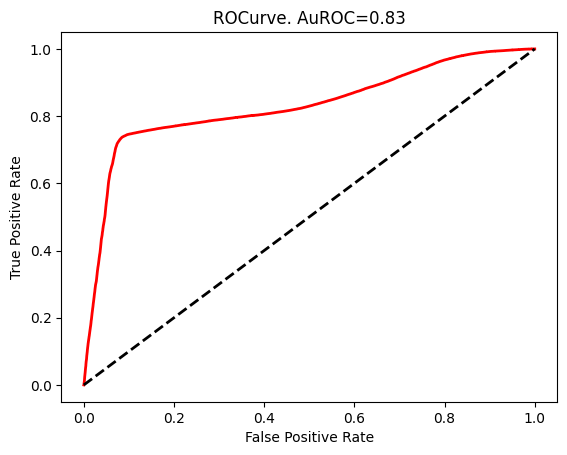

In [105]:
# receiver operational characteristic
fpr, tpr, thresholds = roc_curve(y_test, errors)
auROC = auc(fpr, tpr)
plt.figure()
plt.title(f'ROCurve. AuROC={auROC:.2f}')
plt.plot(fpr, tpr, color='r', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1], [0,1], color='k', lw=2, linestyle='--')
plt.show()